In [1]:
!pip install -qU langgraph langchain langchain-google-genai langchain-communitY

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.3 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
from typing import TypedDict, Literal
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import ChatPromptTemplate
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage, HumanMessage
from IPython.display import display, Image

In [14]:
class AgentState(TypedDict):
  query: str
  category: Literal["english","math","science","computer-science"]
  response: str

In [15]:
def agent_work(query,temperature):
  prompt = ChatPromptTemplate.from_template(
    f"""
    Identify the query to put in the specific category
    Category = ["english","math","science","computer-science"]
    Query:{query}
    """
  )
  chain = prompt | ChatGoogleGenerativeAI(temperature=0,model='gemini-1.5-flash',api_key=userdata.get('GOOGLE_API_KEY'))
  category = chain.invoke({"query":query}).content.strip().lower()
  return category


In [18]:
def catergory_node(state: AgentState):
  """Catgorize the students query into english, math science or computer-science """
  query = state['query']
  category = agent_work(query,0.2)
  return {"category":category}

def Math_support(state:AgentState):
  """Provide Math Support response to the query"""
  print("Inside Math")
  prompt = ChatPromptTemplate.from_template(
      f"""
      Provide a Math support response to the following query
      Query: {state['query']}
      """
  )
  chain = prompt | ChatGoogleGenerativeAI(temperature=0.3,model='gemini-1.5-flash',api_key=userdata.get('GOOGLE_API_KEY'))
  response = chain.invoke({"query":state['query']}).content.strip().lower()
  return {"response":response}

def English_support(state:AgentState):
  """Provide English Support response to the query"""
  print("Inside English")
  prompt = ChatPromptTemplate.from_template(
      f"""
      Provide a English support response to the following query
      Query: {state['query']}
      """
  )
  chain = prompt | ChatGoogleGenerativeAI(temperature=0.3,model='gemini-1.5-flash',api_key=userdata.get('GOOGLE_API_KEY'))
  response = chain.invoke({"query":state['query']}).content.strip().lower()
  return {"response":response}

def Science_Support(state:AgentState):
  """Provide Science Support response to the query"""
  print("Inside Science")
  prompt = ChatPromptTemplate.from_template(
      f"""
      Provide a Science support response to the following query
      Query: {state['query']}
      """
  )
  chain = prompt | ChatGoogleGenerativeAI(temperature=0.3,model='gemini-1.5-flash',api_key=userdata.get('GOOGLE_API_KEY'))
  response = chain.invoke({"query":state['query']}).content.strip().lower()
  return {"response":response}
def Computer_Science_Support(state:AgentState):
  """Provide Computer Science Support response to the query"""
  print("Inside Computer Science")
  prompt = ChatPromptTemplate.from_template(
      f"""
      Provide a Computer Science support response to the following query
      Query: {state['query']}
      """
  )
  chain = prompt | ChatGoogleGenerativeAI(temperature=0.3,model='gemini-1.5-flash',api_key=userdata.get('GOOGLE_API_KEY'))
  response = chain.invoke({"query":state['query']}).content.strip().lower()
  return {"response":response}
def route_query(state:AgentState) -> Literal["english_support","math_support","science_support","computer_science_support"]:
  """Route query based on its category"""
  if state["category"] == "english":
    return 'english_support'
  elif state["category"] == "math":
    return 'math_support'
  elif state["category"] == "science":
    return 'science_support'
  elif state["category"] == "computer-science":
    return 'computer_science_support'
  else:
    return ValueError(f'Unknown Category: {state["category"]}')


In [20]:
builder = StateGraph(AgentState)
builder.add_node('category_node',catergory_node)
builder.add_node('english_support',English_support)
builder.add_node('math_support',Math_support)
builder.add_node('science_support',Science_Support)
builder.add_node('computer_science_support',Computer_Science_Support)
builder.add_edge(START, 'category_node')
builder.add_conditional_edges('category_node', route_query)
builder.add_edge('english_support', END)
builder.add_edge('math_support', END)
builder.add_edge('computer_science_support',END)
builder.add_edge('science_support', END)
graph = builder.compile()

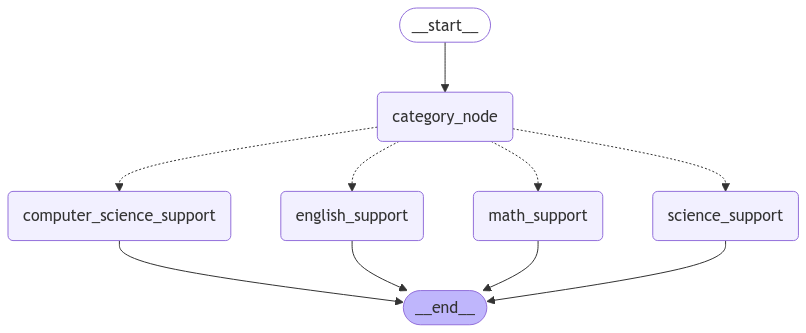

In [21]:
display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)

In [23]:
intial_state = {
    "query": "Write is (a+b)^2?",
    "category": "",
    "response": ""
}
final_state = graph.invoke(intial_state)
final_state

Inside Math


{'query': 'Write is (a+b)^2?',
 'category': 'math',
 'response': "the expression (a + b)² is not a single value; it's an algebraic expression that can be simplified.  to expand it, we use the distributive property (often called foil):\n\n(a + b)² = (a + b)(a + b) = a(a + b) + b(a + b) = a² + ab + ba + b² = a² + 2ab + b²\n\ntherefore, (a + b)² = a² + 2ab + b²"}